In [3]:
from IPython.core import display
from io import BytesIO
from PIL import Image
import numpy as np
import random
import os
import neurolab as nl
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import time
import pylab as pl

%matplotlib inline

In [4]:
os.chdir("..")
%pwd

u'C:\\Users\\joeal_000\\Documents\\GitHub\\compOpt_Project'

In [5]:
def getData(path):
    "Splits the data into X and y both being numpy arrays (data already normalized)"
    f = open(path)
    lines = f.readlines()
    f.close
    
    images = []
    classification = []
    for line in lines:
        nums = line.split()
        classification.append(nums[0])
        images.append([((float (val))) for val in nums[1:]])
    return (np.array(classification, dtype=np.float),np.array(images))

def display_grayscale(arr):
    "SIDE EFFECTS: INTENDED TO BE USED IN IPYTHON NOTEBOOK"
    img = np.array([round(val,2) for val in arr]).astype('uint8').reshape((16,16))
    plt.imshow(img, cmap = cm.Greys_r)
    return Image.fromarray(img)

In [6]:
#get the data in two arrays classifications and the actual data

#classificationTrain,trainData = getData("ZipDigits.train.txt")
#classificationTest,testData = getData("ZipDigits.test.txt")
#combined set since we will use or on seperation technique
classification,data = getData('combinedData.txt')

In [10]:
# Create network with 256 inputs, 2 neurons in hidden layer
# And 256 in output layer

#ann = nl.load('features/ann80.net')
size = 500
subData = data[:size]
inputParams = [[-1, 1]] * len(subData[0])
ann = nl.net.newff(inputParams, [80,256])
ann.trainf = nl.train.train_rprop
ann.errorf = nl.error.MAE()

In [8]:
#cuts the last layer off of ann making the net that makes the features
inputParams = [[-1, 1]] * len(subData[0])
featureNet = nl.net.newff(inputParams, [80])
featureNet.layers[0].np['w'][:] = ann.layers[0].np['w']
featureNet.layers[0].np['b'][:] = ann.layers[0].np['b']

In [8]:
#trainNetFeatures = featureNet.sim(trainData)
#testNetFeatures = featureNet.sim(testData)
netFeatures = featureNet.sim(data)

In [14]:
#np.savetxt('features/trainNetFeatures.txt', trainNetFeatures)
#np.savetxt('features/testNetFeatures.txt', testNetFeatures)
#np.savetxt('features/classificationTrain.txt',classificationTrain)
#np.savetxt('features/classificationTest.txt',classificationTest)

#for combined data since we will probably use K-folds anyway
np.savetxt('features/netFeatures.txt', netFeatures)
np.savetxt('features/classification.txt', classification)


(9298,)

In [11]:
# Train process
#last condition epochs=100000000,show=100000,
err = ann.train(subData, subData,epochs=10,show=1, goal=0.05)

Epoch: 1; Error: 0.962345061284;
Epoch: 2; Error: 0.926926112897;
Epoch: 3; Error: 0.505957472174;
Epoch: 4; Error: 0.438231929322;
Epoch: 5; Error: 0.413125757541;
Epoch: 6; Error: 0.376208365823;
Epoch: 7; Error: 0.35045285757;
Epoch: 8; Error: 0.331019198226;
Epoch: 9; Error: 0.310863380354;
Epoch: 10; Error: 0.294346651981;
The maximum number of train epochs is reached


In [11]:
#this block just used for comparing random pictures within the training set
ind = random.randrange(0,size)
sub = ann.sim(subData[ind:ind+1])
print "test"
exIn = display_grayscale(sub[0])

NameError: name 'sub' is not defined

In [12]:
exOut = display_grayscale(data[ind])

NameError: name 'ind' is not defined

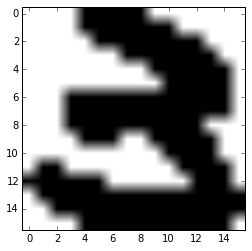

In [63]:
#outside of the data set
ind = random.randrange(size,size+200)
exampleInput = display_grayscale(data[ind])

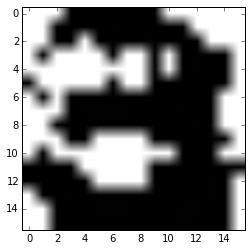

In [64]:
exampleOutput = ann.sim(data[ind:ind+1])
#exampleTest = 
exampleOut = display_grayscale(exampleOutput[0])

#example.save('example1OUTPUT.png')

In [10]:
ann.save('features/ann80.net')

In [45]:
out = ann.sim(data[500:])

In [14]:
np.savetxt('features/data80NetFeatures', out)

In [69]:
testt = ann.sim(subData)
f = nl.error.MSE()
f(data[500:], out)

0.20656246494018735

0.19631478622651999

In [1]:
err

NameError: name 'err' is not defined

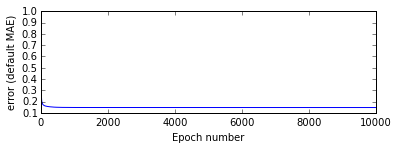

In [8]:
pl.subplot(211)
pl.plot(err)
pl.xlabel('Epoch number')
pl.ylabel('error (default MAE)')

In [9]:
ann.errorf

<neurolab.error.MAE instance at 0x000000000E1E44C8>

In [17]:
x = np.array([[-.5],[.5]])
np.sign(x)

array([[-1.],
       [ 1.]])